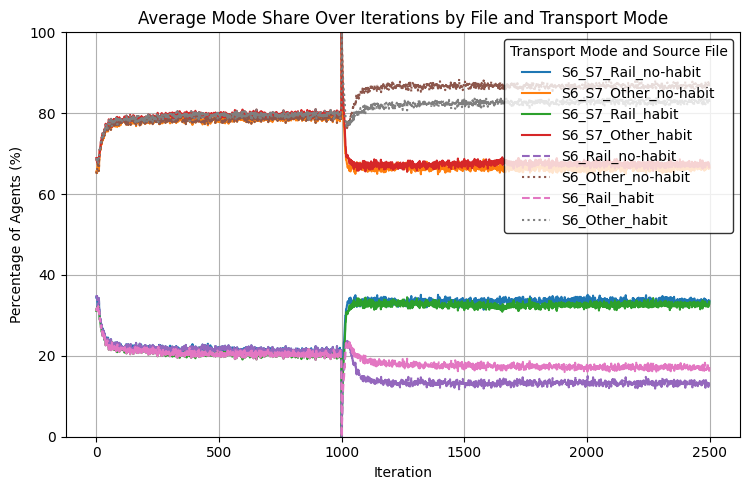

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# 파일 리스트와 데이터프레임 리스트
file_names = ['no-habit.csv', 'habit.csv']
dataframes = [pd.read_csv(file_name) for file_name in file_names]

# 조건을 변수로 설정
RAIL_INDICATORS_S6_S7 = ['S6', 'S7']  # 철도(rail)로 분류할 문자열 조건 (S6, S7)
RAIL_INDICATORS_S6 = ['S6']           # 철도(rail)로 분류할 문자열 조건 (S6만)

# 넓은 그래프 크기 설정 (예: 7.6 x 5 인치)
fig_width, fig_height = 7.6, 5

# 각 파일에 대해 'RAIL_INDICATORS' 포함 여부로 운송 모드를 분류하고 그룹화
transport_modes_s6_s7 = []
transport_modes_s6_only = []

def classify_transport_mode(route, rail_indicators):
    """주어진 문자열에 rail_indicators가 포함되면 'rail', 아니면 'other' 반환"""
    return 'rail' if any(indicator in route for indicator in rail_indicators) else 'other'

for df, file_name in zip(dataframes, file_names):
    # S6, S7을 포함한 rail과 other(나머지) 계산
    df['Transport Mode_S6_S7'] = df['Route'].apply(lambda x: classify_transport_mode(x, RAIL_INDICATORS_S6_S7))
    df_transport_mode_s6_s7 = df.groupby(['Iteration', 'Transport Mode_S6_S7']).size().unstack(fill_value=0)
    
    # S6만 포함한 rail과 other(나머지) 계산
    df['Transport Mode_S6'] = df['Route'].apply(lambda x: classify_transport_mode(x, RAIL_INDICATORS_S6))
    df_transport_mode_s6 = df.groupby(['Iteration', 'Transport Mode_S6']).size().unstack(fill_value=0)

    # 전체 에이전트 수로 나누어 백분율 계산
    df_transport_mode_s6_s7_percentage = df_transport_mode_s6_s7.div(df_transport_mode_s6_s7.sum(axis=1), axis=0) * 100
    df_transport_mode_s6_percentage = df_transport_mode_s6.div(df_transport_mode_s6.sum(axis=1), axis=0) * 100
    
    transport_modes_s6_s7.append((df_transport_mode_s6_s7_percentage, file_name))
    transport_modes_s6_only.append((df_transport_mode_s6_percentage, file_name))

# 데이터 시각화
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# S6, S7을 포함한 철도(rail)와 나머지(other) 그래프 그리기
for df_transport_mode_s6_s7_percentage, file_name in transport_modes_s6_s7:
    label_name = file_name.split(".")[0]  # 확장자를 제외한 파일명
    df_transport_mode_s6_s7_percentage['rail'].plot(kind='line', ax=ax, label=f'S6_S7_Rail_{label_name}')
    df_transport_mode_s6_s7_percentage['other'].plot(kind='line', ax=ax, label=f'S6_S7_Other_{label_name}')

# S6만 포함한 철도(rail)와 나머지(other) 그래프 그리기
for df_transport_mode_s6_percentage, file_name in transport_modes_s6_only:
    label_name = file_name.split(".")[0]  # 확장자를 제외한 파일명
    df_transport_mode_s6_percentage['rail'].plot(kind='line', ax=ax, label=f'S6_Rail_{label_name}', linestyle='--')
    df_transport_mode_s6_percentage['other'].plot(kind='line', ax=ax, label=f'S6_Other_{label_name}', linestyle=':')

# 축 및 레이블 설정
ax.set_title('Average Mode Share Over Iterations by File and Transport Mode')
ax.set_xlabel('Iteration')
ax.set_ylabel('Percentage of Agents (%)')
ax.set_ylim(0, 100)  # y축을 0에서 100으로 설정
ax.grid(True)

# 범례를 그래프 오른쪽 위 안쪽에 고정
ax.legend(
    title='Transport Mode and Source File',
    loc='upper right',
    bbox_to_anchor=(1, 1),
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

plt.tight_layout()

# 그래프를 저장하고 표시
plt.savefig('Average_Mode_Share_Comparison.png')
plt.show()


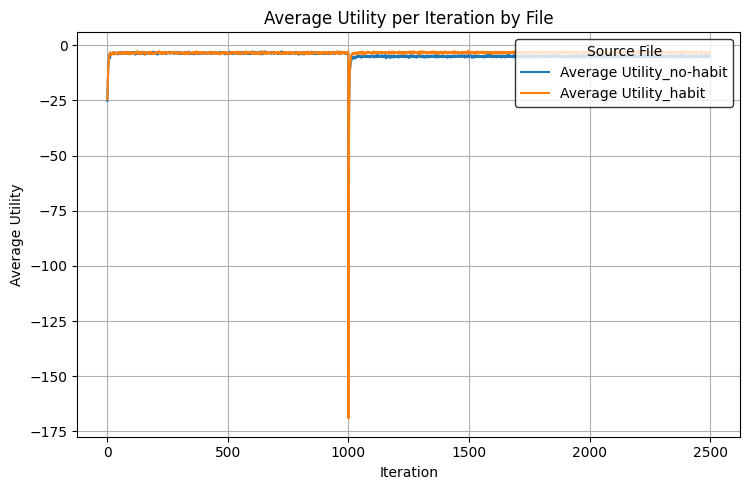

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드 (파일명을 자신의 파일로 변경하세요)
file_names = ['no-habit.csv', 'habit.csv']
dataframes = [pd.read_csv(file_name) for file_name in file_names]

# 넓은 그래프 크기 설정 (예: 24x8 인치)
fig_width, fig_height = 7.6 , 5

# 반복별 평균 유틸리티 계산 및 데이터 저장
average_utilities = []
for df, file_name in zip(dataframes, file_names):
    df_average_utility = df.groupby('Iteration')['Total Utility'].mean()  # 평균 계산
    average_utilities.append((df_average_utility, file_name))

# 데이터 시각화 설정
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# 그래프에 각 파일의 데이터 추가
for df_average_utility, file_name in average_utilities:
    linestyle = '--' if 'Normal' in file_name else '-'  # 'Normal' 파일은 점선으로 표시
    label_name = file_name.split(".")[0]  # 확장자를 제외한 파일명
    df_average_utility.plot(ax=ax, label=f'Average Utility_{label_name}', linestyle=linestyle)

# 축 및 레이블 설정
ax.set_title("Average Utility per Iteration by File")
ax.set_xlabel('Iteration')
ax.set_ylabel('Average Utility')
#ax.set_ylim(-2500, -200)  # y축을 -2500에서 -200으로 설정 (데이터에 맞게 조정)
ax.grid(True)

# 범례를 그래프 오른쪽 위 안쪽에 고정
ax.legend(
    title='Source File',
    loc='upper right',        # 그래프의 오른쪽 위
    bbox_to_anchor=(1, 1),    # 축 안쪽으로 위치 고정
    frameon=True,              # 범례에 테두리 추가
    facecolor='white',
    edgecolor='black'
)

plt.tight_layout()
plt.savefig('Average Utility per Iteration by File.png')
plt.show()
